In [5]:
import pandas as pd

In [2]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tkinter import *
import tkinter.messagebox
from PIL import ImageTk, Image
import matplotlib.pyplot as plt



In [7]:
#Read the datasets
dataset=pd.read_csv("weight-height.csv")

In [8]:
#Check the dataset
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [91]:
dataset['Gender'].replace('Female',0,inplace=True)
dataset['Gender'].replace('Male',1,inplace=True)

In [92]:
dataset.head(10)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
5,1,67.253016,152.212156
6,1,68.785081,183.927889
7,1,68.348516,167.971110
8,1,67.018950,175.929440
9,1,63.456494,156.399676


In [93]:
#check if null values is present in dataset or not.....
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [94]:
#Checking the dimensions of the dataset
dataset.shape

(10000, 3)

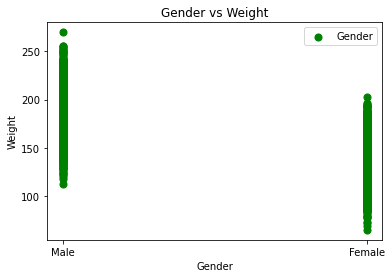

In [71]:
#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

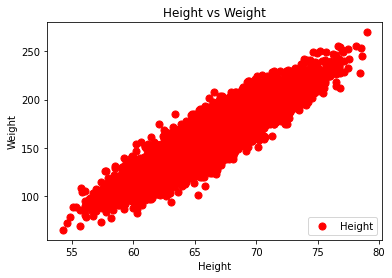

In [72]:
#Plot Height vs Weight............
x2 = dataset.iloc[:, 1].values
y2 = dataset.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='Red',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

In [73]:
#separating the dependent and independent values....
#X-Independent variable
X = dataset.iloc[:, 1:2].values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [74]:
#y-dependent or target variable
y = dataset.iloc[:, 2].values
print(y)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [76]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)

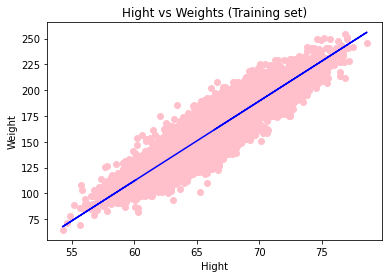

In [77]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Pink')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [78]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [7.72896259]
Mean squared error: 143.23
Variance score: 0.86


In [79]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 7000 samples in the training set and 3000 samples in the test set


In [80]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

In [81]:
my=regressor.predict([[74]])

In [82]:
print(my)


[220.34639943]


In [83]:
my=regressor.predict([[72]])/2.205
print(my)

[92.91994297]


In [3]:
def fun():
    t=my_box.get()
    t1=float(t)*12
    g=my_b.get()
    my=regressor.predict([[t1]])/2.205
    l=Label(top,text="Your height in inches is:",font=("Arial",25),fg="blue")
    l.pack(pady=10)

    la=Label(top,text=float(t)*12)
    la.pack(pady=10)
    l1=Label(top,text="Your predicted weight in kg is:",font=("Arial",25),fg="red")
    l1.pack(pady=10)
    la1=Label(top,text=my)
    la1.pack(pady=10)
    
    l2=Label(top,text="Your diffrence in weight(kg) is:",font=("Arial",25))
    l2.pack(pady=10)
    d=float(g)-my
    la2=Label(top,text=d)
    la2.pack(pady=10)
    if(d>=-5 and d<=5):
        l3=Label(top,text="YOU ARE HEALTHY!",font=("Arial",25),fg="green")
        l3.pack(pady=5)
    elif(d>5):
        l3=Label(top,text="YOU ARE OVERWEIGHT. DIET PLAN A",font=("Arial",25),fg="red")
        l3.pack(pady=5)
        window=tkinter.Toplevel()
        test = ImageTk.PhotoImage(file='C:\\Users\\Aprotim\\OneDrive\\Desktop\\weight\\Diet-A.gif')
        label1 =Label(window,image=test)
        # Position image
        label1.place(x=100, y=100)
        window.mainloop()
    elif(d<-5):
        l3=Label(top,text="YOU ARE UNDERWEIGHT. DIET PLAN B",font=("Arial",25),fg="red")
        l3.pack(pady=5)
        window=tkinter.Toplevel()
        test = ImageTk.PhotoImage(file='C:\\Users\\Aprotim\\OneDrive\\Desktop\\weight\\Diet-B.gif')
        label1 =Label(window,image=test)
        # Position image
        label1.place(x=100, y=100)
        window.mainloop()
top=tkinter.Tk()
l1=Label(top,text="Enter 1 if Male & 0 if Female:",font=("Arial",20),fg="green")
l1.pack(pady=10)
my_bo=Entry(top)
my_bo.pack(pady=10)
my_button=Button(top,text="Enter",font=("Arial",10))
my_button.pack(pady=10)
l2=Label(top,text="Your present weight in kg:",font=("Arial",20),fg="red")
l2.pack(pady=10)
my_b=Entry(top)
my_b.pack(pady=10)
my_button=Button(top,text="Enter",font=("Arial",10))
my_button.pack(pady=10)


my_lable=Label(top,text="Your height in ft:",font=("Arial",20),fg="blue")
my_lable.pack(pady=20)
my_box=Entry(top)
my_box.pack(pady=10)
my_button=Button(top,text="Enter",font=("Arial",10),command=fun)
my_button.pack(pady=5)
top.mainloop()
